In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from skimage import io
from skimage import transform
from sklearn.utils import shuffle
from keras.utils import np_utils
import scipy.stats

ImportError: Traceback (most recent call last):
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\nikit\anaconda3_64\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\nikit\anaconda3_64\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\nikit\anaconda3_64\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Файл подкачки слишком мал для завершения операции.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
frame = pd.read_csv('samples_with_marks.csv')
frame.head
filenames = np.asarray(frame['filename'])
result_ = np.asarray(frame['result'])

Y_ = np.ndarray((filenames.size, 32, 32))
for i in range(filenames.size):
    X = io.imread(filenames[i], as_gray = True) 
    #максимальная длина картинки в наших данных - 31
    X = np.r_[np.c_[X, np.ones((X.size // X[1].size, 32 - X[1].size))], np.ones((32-X.size // X[1].size, 32))] 
    Y_[i] = X
Y_ = 1-Y_
Y_ = Y_.astype('float32')

            
count1 = 0
count2 = 0
count3 = 0

for i in range(len(result_)):
    if result_[i] == 1:
        count1 += 1
        if count1 > 350:
            result_[i] = 100
            
for i in range(len(result_)):
    if result_[i] == 2:
        count2 += 1
        if count2 > 350:
            result_[i] = 100
            
for i in range(len(result_)):
    if result_[i] == 3:
        count3 += 1
        if count3 > 350:
            result_[i] = 100

In [3]:
waste = [i for i in range(result_.shape[0]) if result_[i] == 10 or result_[i] == 11]
result_ = np.delete(result_, waste, axis = 0)
Y_ = np.delete(Y_, waste, axis = 0)

waste = [i for i in range(result_.shape[0]) if result_[i] == 100]
result_ = np.delete(result_, waste, axis = 0)
Y_ = np.delete(Y_, waste, axis = 0)

In [4]:
num_train = 6000
num_test = 1000
height, width, depth = 32, 32, 1 
num_classes = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') 
Y_train = np.ndarray((num_train, height, width))
for i in range(num_train):
    Y_train[i] = np.r_[np.c_[X_train[i], np.ones((28, 4))], np.ones((4, 32))]
Y_train /= 255
y_train = y_train[:num_train]

Y_ = np.concatenate([Y_, Y_train])
result_ = np.concatenate([result_, y_train])

Y_, result_ = shuffle(Y_, result_)

#Y_rotate_1 = []
#for i in Y_:
#    angle = np.random.rand() * 60 - 30
#    Y_rotate_1.append(transform.rotate(i, angle))
#Y_rotate_1 = np.asarray(Y_rotate_1)

#Y_rotate_2 = []
#for i in Y_:
#    angle = np.random.rand() * 80 - 40
#    Y_rotate_2.append(transform.rotate(i, angle))
#Y_rotate_2 = np.asarray(Y_rotate_2)

#Y_rotate_3 = []
#for i in Y_:
#    angle = np.random.rand() * 30 - 15
#    Y_rotate_3.append(transform.rotate(i, angle))
#Y_rotate_3 = np.asarray(Y_rotate_3)

In [5]:
#X = []
#X_rotate = []
#for y in Y_:
    #X.append(transform.resize(y, (64, 64)))
#for y in Y_rotate:
    #X_rotate.append(transform.resize(y, (64, 64)))

Y_ = np.around(Y_)
#Y_rotate_1 = np.around(Y_rotate_1)
#Y_rotate_2 = np.around(Y_rotate_2)
#Y_rotate_3 = np.around(Y_rotate_3)

#Z = np.stack([Y_, Y_rotate_1], axis = -1)

In [6]:
Y_test = Y_[::10]
result_test = result_[::10]     
Y = np.delete(Y_, list(range(0, Y_.shape[0], 10)), axis=0)
result = np.delete(result_, list(range(0, result_.shape[0], 10)), axis=0)
num_classes = 10

In [9]:

model_211 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.55),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.45),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
weights_file = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file, monitor='acc')

model_211.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_211.fit(Y.reshape(-1, 32, 32, 1), result, epochs=50, batch_size = 100, callbacks=[checkpoint])
model_211.evaluate(Y_test.reshape(-1, 32, 32, 1), result_test)

Epoch 1/50
85/85 [==============================] - 6s 71ms/step - loss: 1.7726 - accuracy: 0.3441
Epoch 2/50
85/85 [==============================] - 6s 72ms/step - loss: 0.3033 - accuracy: 0.9069
Epoch 3/50
85/85 [==============================] - 6s 71ms/step - loss: 0.1525 - accuracy: 0.9513
Epoch 4/50
85/85 [==============================] - 6s 72ms/step - loss: 0.1095 - accuracy: 0.9659
Epoch 5/50
85/85 [==============================] - 6s 72ms/step - loss: 0.0958 - accuracy: 0.9708
Epoch 6/50
85/85 [==============================] - 6s 72ms/step - loss: 0.0816 - accuracy: 0.9760
Epoch 7/50
85/85 [==============================] - 6s 72ms/step - loss: 0.0712 - accuracy: 0.9776
Epoch 8/50
85/85 [==============================] - 6s 71ms/step - loss: 0.0571 - accuracy: 0.9815
Epoch 9/50
85/85 [==============================] - 8s 91ms/step - loss: 0.0592 - accuracy: 0.9826
Epoch 10/50
85/85 [==============================] - 6s 71ms/step - loss: 0.0540 - accuracy: 0.9839
Epoch 11/

[0.07525429874658585, 0.9765458703041077]

In [12]:
model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

weights_file = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file, monitor='acc')

models = [model_0, model_1, model_2, model_3, model_4, model_5, model_6]
num_mod = 7

In [13]:
for i in range(num_mod):
    models[i].compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) 
    
    models[i].fit(Y, result, epochs=15, batch_size = 60, callbacks=[checkpoint])
    


Epoch 1/15
84/84 [==============================] - 5s 61ms/step - loss: 0.9394 - accuracy: 0.7167
Epoch 2/15
84/84 [==============================] - 5s 54ms/step - loss: 0.1328 - accuracy: 0.9648
Epoch 3/15
84/84 [==============================] - 5s 57ms/step - loss: 0.0731 - accuracy: 0.9811
Epoch 4/15
84/84 [==============================] - 5s 63ms/step - loss: 0.0525 - accuracy: 0.9867
Epoch 5/15
84/84 [==============================] - 5s 55ms/step - loss: 0.0498 - accuracy: 0.9875
Epoch 6/15
84/84 [==============================] - 5s 63ms/step - loss: 0.0410 - accuracy: 0.9903
Epoch 7/15
84/84 [==============================] - 8s 90ms/step - loss: 0.0376 - accuracy: 0.9916
Epoch 8/15
84/84 [==============================] - 6s 68ms/step - loss: 0.0335 - accuracy: 0.9912
Epoch 9/15
84/84 [==============================] - 6s 77ms/step - loss: 0.0371 - accuracy: 0.9910
Epoch 10/15
84/84 [==============================] - 6s 70ms/step - loss: 0.0285 - accuracy: 0.9926
Epoch 11/

In [18]:
d_test = np.ndarray((num_mod, result_.shape[0]))
for i in range(num_mod):
    d_test[i] = np.argmax(models[i].predict(Z), axis = 1)
d_test = d_test.transpose()
most, mostcc = scipy.stats.mode(d_test, axis=1)

mist = 0
most.reshape(most.shape[0],)
for i in range(most.shape[0]):
    if most[i] != result_[i]:
        mist += 1/most.shape[0]
print(mist)

0.001969561324977619


In [19]:
indexes = []
for i in range(most.shape[0]):
    if most[i] != result_[i]:
        indexes.append(i)
        print(i, most[i], result_[i])

74 [6.] 7
210 [2.] 1
257 [7.] 8
1744 [7.] 6
1964 [3.] 4
2474 [5.] 6
3103 [5.] 4
3640 [1.] 9
3664 [7.] 6
4509 [7.] 6
4880 [7.] 6


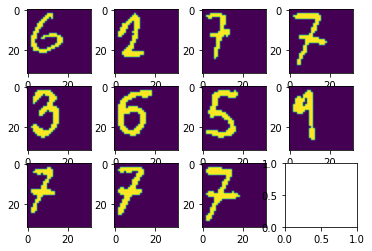

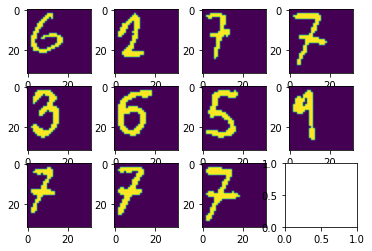

In [21]:
io.imshow_collection([Y_[i] for i in indexes])

In [22]:
result_[74] = 6
result_[210] = 2
result_[257] = 7
result_[1744] = 7
result_[1964] = 3
result_[3103] = 5
result_[3640] = 1
result_[3664] = 7
result_[4509] = 7
result_[4880] = 7


In [20]:
num_classes = 11
Z_1 = Z[:Z.shape[0] // 2]
Z_2 = Z[Z.shape[0] // 2:]
result_1 = result_[:Z.shape[0] // 2]
result_2 = result_[Z.shape[0] // 2:]


In [25]:
model_211 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 2), filters=32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(.65),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256*8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.6),
    tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])
weights_file = 'weights.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(weights_file, monitor='acc')

model_211.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model_211.fit(Z_2, result_2, epochs=20, batch_size = 60, callbacks=[checkpoint])

Epoch 1/20
49/49 [==============================] - 3s 66ms/step - loss: 1.4945 - accuracy: 0.5608
Epoch 2/20
49/49 [==============================] - 3s 63ms/step - loss: 0.3320 - accuracy: 0.8998
Epoch 3/20
49/49 [==============================] - 3s 65ms/step - loss: 0.1574 - accuracy: 0.9497
Epoch 4/20
49/49 [==============================] - 3s 63ms/step - loss: 0.1144 - accuracy: 0.9639
Epoch 5/20
49/49 [==============================] - 3s 64ms/step - loss: 0.0793 - accuracy: 0.9697
Epoch 6/20
49/49 [==============================] - 3s 67ms/step - loss: 0.0768 - accuracy: 0.9735
Epoch 7/20
49/49 [==============================] - 5s 110ms/step - loss: 0.0633 - accuracy: 0.9797
Epoch 8/20
49/49 [==============================] - 3s 63ms/step - loss: 0.0381 - accuracy: 0.9849
Epoch 9/20
49/49 [==============================] - 3s 63ms/step - loss: 0.0485 - accuracy: 0.9831
Epoch 10/20
49/49 [==============================] - 3s 62ms/step - loss: 0.0339 - accuracy: 0.9883
Epoch 11

In [26]:
d_test = np.argmax(model_211.predict(Z_1), axis = 1)
indexes = []
for i in range(d_test.shape[0]):
    if d_test[i] != result_1[i]:
        indexes.append(i)
        print(i, d_test[i], result_1[i])

2 10 1
3 10 1
5 10 1
6 5 3
9 10 1
11 7 9
12 10 1
16 10 1
18 10 1
20 10 1
21 7 3
22 10 1
23 10 1
24 10 1
25 10 1
27 10 1
29 10 1
30 10 1
33 10 1
35 10 1
40 10 1
42 10 1
43 10 1
44 10 1
45 10 1
46 5 3
49 10 0
50 3 9
56 10 1
62 10 9
64 10 1
67 9 3
74 10 3
75 3 9
77 10 4
120 10 8
123 2 10
137 10 8
142 10 1
149 10 1
157 4 10
164 10 5
313 10 1
381 5 10
445 10 1
528 10 1
618 1 10
740 2 1
767 10 6
835 2 10
866 2 10
956 6 7
996 4 2
1026 10 1
1108 3 2
1111 2 3
1272 10 1
1298 10 1
1335 3 4
1431 10 1
1638 10 1
1640 10 4
1658 2 3
1665 4 7
1677 10 7
1679 10 8
1842 10 2
1843 10 7
1848 10 2
1849 10 8
1854 3 9
1856 10 2
1857 10 7
1858 10 8
1868 10 2
1869 10 8
1874 10 8
1875 10 8
1878 10 8
1881 10 9
1882 3 2
2127 9 3
2175 9 3
2176 9 3
2296 10 2
2414 0 3
2426 9 3
2439 9 3
2465 9 3
2501 0 3
2509 9 3
2518 4 2
2535 1 4
2537 10 4
2574 9 3
2597 10 3
2607 10 9
2609 0 3
2611 10 3
2630 9 3
2650 10 3
2740 10 1
2773 7 6
2774 1 10
2787 7 6
2794 10 8
2800 7 6
2812 7 6
2884 2 9


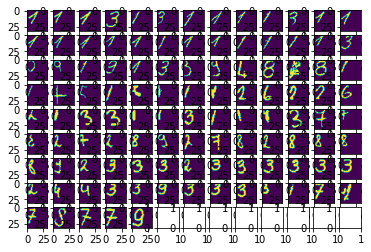

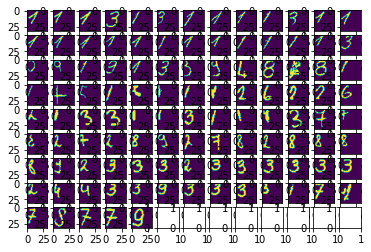

In [27]:
Y_1 = Y_[:Z.shape[0] // 2]
io.imshow_collection([Y_1[i] for i in indexes])

In [24]:
result_[Z.shape[0] // 2 + 117] = 0
result_[Z.shape[0] // 2 + 708] = 10
result_[Z.shape[0] // 2 + 900] = 10
result_[Z.shape[0] // 2 + 960] = 10
result_[Z.shape[0] // 2 + 1001] = 10
result_[Z.shape[0] // 2 + 1005] = 10

result_[Z.shape[0] // 2 + 1595] = 7
result_[Z.shape[0] // 2 + 1772] = 10
result_[Z.shape[0] // 2 + 2152] = 10
result_[Z.shape[0] // 2 + 2160] = 10
result_[Z.shape[0] // 2 + 2668] = 5

In [28]:
result_[11] = 10
result_[21] = 10
result_[49] = 10
result_[50] = 10
result_[142] = 10
result_[149] = 10
result_[164] = 10
result_[313] = 10
result_[445] = 10
result_[528] = 10
result_[740] = 2
result_[956] = 6
result_[996] = 10
result_[1026] = 10
result_[1108] = 3
result_[1272] = 10
result_[1298] = 10
result_[1335] = 3
result_[1638] = 10
result_[1431] = 10
result_[1640] = 10
result_[1677] = 10
result_[1679] = 10
result_[1881] = 10
result_[2597] = 10
result_[2650] = 10
result_[2740] = 10
result_[2773] = 7
result_[2787] = 7
result_[2800] = 7
result_[2812] = 7

In [29]:
frame2 = [[filenames[i], result_[i]] for i in range(len(result_))]
frame2 = pd.DataFrame(frame2)
frame2.columns = ['filename',  'result']
frame2.head

<bound method NDFrame.head of                                     filename  result
0     right/1983/loc-d19830101_0163_1393.jpg       1
1     right/1983/loc-d19830101_0176_1396.jpg       6
2     right/1983/loc-d19830101_0487_1436.jpg       1
3     right/1983/loc-d19830102_0157_1371.jpg       1
4     right/1983/loc-d19830102_0170_1374.jpg       6
...                                      ...     ...
5804  right/2005/loc-d20050619_1414_1289.jpg       2
5805  right/2005/loc-d20050620_0335_1444.jpg       7
5806  right/2005/loc-d20050620_0353_1447.jpg       0
5807  right/2005/loc-d20050620_1273_1327.jpg       7
5808  right/2005/loc-d20050620_1289_1331.jpg       2

[5809 rows x 2 columns]>

In [30]:
frame2.to_csv('samples_with_marks.csv', sep=',', index = False)
samples = pd.read_csv('samples_with_marks.csv')
samples.head

<bound method NDFrame.head of                                     filename  result
0     right/1983/loc-d19830101_0163_1393.jpg       1
1     right/1983/loc-d19830101_0176_1396.jpg       6
2     right/1983/loc-d19830101_0487_1436.jpg       1
3     right/1983/loc-d19830102_0157_1371.jpg       1
4     right/1983/loc-d19830102_0170_1374.jpg       6
...                                      ...     ...
5804  right/2005/loc-d20050619_1414_1289.jpg       2
5805  right/2005/loc-d20050620_0335_1444.jpg       7
5806  right/2005/loc-d20050620_0353_1447.jpg       0
5807  right/2005/loc-d20050620_1273_1327.jpg       7
5808  right/2005/loc-d20050620_1289_1331.jpg       2

[5809 rows x 2 columns]>